In [1]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('eval_ammos.csv')

In [46]:
eval_episodes = 10
max_checkpoint = 20000
checkpoint_interval = 500

In [47]:
df['episode'] = np.NaN
df['checkpoint'] = np.NaN

In [48]:
episode_markers = df[~(df['timeStep'].diff() > 0)].index.values

In [50]:
df.loc[episode_markers, 'episode'] = list(range(1, eval_episodes+1)) * int(max_checkpoint / checkpoint_interval + 1) + [1]
df.loc[episode_markers, 'checkpoint'] = [item for item in list(range(0, max_checkpoint+1, checkpoint_interval)) 
                                         for _ in range(eval_episodes)] + [max_checkpoint+checkpoint_interval]

In [51]:
df['episode'].ffill(inplace=True)
df['checkpoint'].ffill(inplace=True)

Text(0, 0.5, 'Timesteps to finished ammos (mean)')

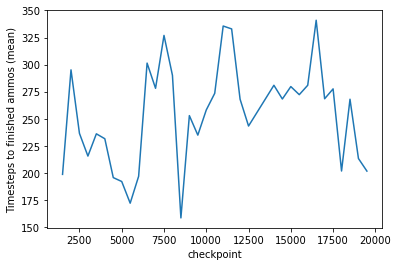

In [54]:
ax = df[df['ammoLeft'] == 0].groupby(['checkpoint', 'episode'])['timeStep'].min().groupby(['checkpoint']).mean().plot()
ax.set_ylabel('Timesteps to finished ammos (mean)')

Text(0, 0.5, 'Ammos left at episode end (mean)')

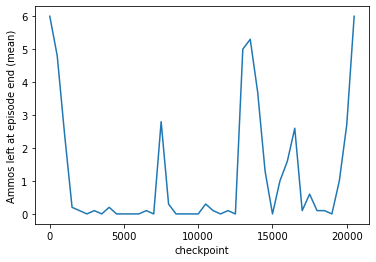

In [55]:
ax = df.groupby(['checkpoint', 'episode'])['ammoLeft'].min().groupby(['checkpoint']).mean().plot()
ax.set_ylabel('Ammos left at episode end (mean)')